In [3]:
#MODE
folder = 'NoCut'

In [1]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import decimal
import time
from sklearn.metrics import auc
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator, AutoMinorLocator
from matplotlib.lines import Line2D
from collections import Counter
import matplotlib.ticker as ticker

In [2]:
def read_file(folder, filename):
    with open(f"{folder}/{filename}.txt", "r") as file:
        reader = csv.reader(file, delimiter=' ')
        return [row for row in reader]
        
def read_file2(folder, filename):
    with open(f"{folder}/{filename}.txt", "r") as file:
        reader = csv.reader(file, delimiter=' ')
        # Skip the first and last element in each row
        return [row[1:-1] for row in reader]

def set_plot_style(labels=None, loc='best'):
    # Automatically set the number of major ticks
    plt.gca().xaxis.set_major_locator(AutoLocator())
    plt.gca().yaxis.set_major_locator(AutoLocator())

    # Automatically set the number of minor ticks
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

    # Change the length of the tick marks
    plt.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)  # Adjust the length as needed
    plt.tick_params(axis='both', which='minor', length=7, width=1.2,direction='in', top=True, right=True)  # Minor ticks

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    # Change the width of the frame surrounding the plot
    for spine in plt.gca().spines.values():
        spine.set_linewidth(2)  # Adjust the linewidth as needed

    # Move the axes inside the plot
    ax = plt.gca()
    ax.spines['top'].set_position(('outward', 0))
    ax.spines['right'].set_position(('outward', 0))
    ax.spines['left'].set_position(('outward', 0))
    ax.spines['bottom'].set_position(('outward', 0))

    # Adjust the position of the ticks
    ax.tick_params(axis='x', direction='in', length=15, width=2)
    ax.tick_params(axis='y', direction='in', length=15, width=2)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Add NOνA Simulation text inside the plot square at the title position
    plt.text(1.0, 1.1, fr'NOvA Simulation', fontsize=25, color='gray', ha='right', va='top', transform=plt.gca().transAxes)

    # Create custom legend handles if labels are provided
    if labels is not None:
        handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
        plt.legend(handles=handles, labels=labels, fontsize=20, loc=loc)
        
def set_sn():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        coeff, exponent = '{:.2e}'.format(x).split('e')
        if float(coeff) == 0:
            return r'$0$'
        else:
            return r'${:.0f}$'.format(float(coeff))

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]

    plt.text(-2, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')



# Code lists mapping
code_lists = {
    11: 'Electron',
    -11: 'Positron',
    13: 'Muon',
    -13: 'Muon +',
    22: 'Gamma',
    211: 'Pion +',
    -211: 'Pion -',
    321: 'Kaon +',
    -321: 'Kaon -',
    2212: 'Proton',
    2112: 'Neutron',
    111: 'Pion 0',
}

def print_percentages(elements):
    # Convert the elements list to integers
    elements = [int(e) for e in elements]
    
    # Count occurrences of each element
    element_counts = Counter(elements)
    
    # Calculate total number of elements
    total_elements = len(elements)
    
    # Calculate the percentage for each element
    element_percentages = {element: (count / total_elements) * 100 for element, count in element_counts.items()}
    
    # Map element counts and percentages to their respective particle IDs
    particle_counts = {code_lists[element]: count for element, count in element_counts.items() if element in code_lists}
    particle_percentages = {code_lists[element]: percentage for element, percentage in element_percentages.items() if element in code_lists}
    
    # Print the results
    print("Particle Counts:")
    for particle, count in particle_counts.items():
        print(f"{particle}: {count} ({particle_percentages[particle]:.2f}%)")


def set_sn2():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # max_value = max(energylost)
    max_value = plt.ylim()[1]
    factor = 10 ** (len(str(int(max_value))) - 1)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        return r'${:.1f}$'.format(x / factor)


    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)-1

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]
    
    xlim = plt.xlim()
    plt.text(xlim[0], upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')

In [6]:
#EXTRACT THE RECO INFORMATION, NUMPRONGS, NUMPI, DIFF .....

start_time = time.time()

#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "recovars"
name_of_file = 'recovars_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------

numprongs = []
diffprimprongs = []
numpireco = []
diffprimpirecopi = []
numtracks = []
diffprimparttracks = []
diffprongstracks = []

for event in globals()[list_variable]:
    numprongs.append(int(event[0]))
    diffprimprongs.append(int(event[1]))
    if float(event[2]) != 0:
        numpireco.append(float(event[2]))
    diffprimpirecopi.append(float(event[3]))
    numtracks.append(float(event[4]))
    diffprimparttracks.append(float(event[4]))
    diffprongstracks.append(float(event[4]))
    
print(sum(numprongs))    
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

2617623
Elapsed time: 3.3498008251190186 seconds


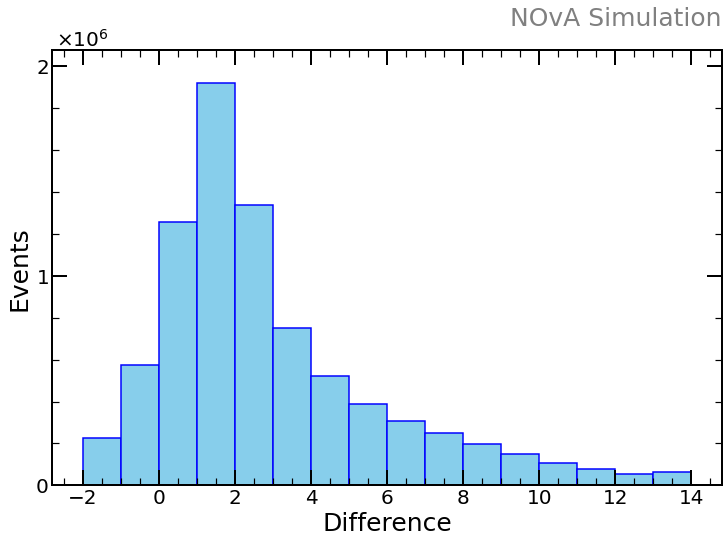

In [7]:
# Define histogram parameters
bin_size = 1
bin_edges = np.arange(-2, 15, bin_size) 

#Diff prim prongs
plt.figure(figsize=(12, 8)) 
plt.hist(diffprimprongs, bins=bin_edges, edgecolor='blue', linewidth=1.5, color='skyblue')
plt.xlabel('Difference', fontsize=25)
plt.ylabel('Events', fontsize=25)
# plt.title('Difference between truth primary particles and prongs', fontsize=30)
#change the number of ticks in the y axis

set_plot_style()
set_sn()
plt.locator_params(axis='y', nbins=4)

# plt.ylim(0,220000)
#plt.yscale('log')
plt.savefig(f"{folder}/images/diffprimprongs.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/diffprimprongs_{folder}.png', bbox_inches='tight')
plt.show()

In [27]:
#check the composition of the True and Reoc particles in the cases of reconstructed pions FOR 1 PION ONLY (WHY?)
folder='QE' 
start_time = time.time()

allpdgtrue=[]
allpdgtrue=read_file2(folder, 'analysisfiles/allpdgNT_part1')

allpdgreco=[]
allpdgreco=read_file2(folder, 'analysisfiles/allpdgReco_part1')

pdgtrues=[]
pdgrecos=[]

for i, event in enumerate(allpdgreco):
#     check events with only one pion
    pion=0
    for element in event:
        if element == '211' or element == '-211':
            pion=pion+1
#     if pion == 1:
    if pion > 0:
        for elements in allpdgtrue[i]:
            pdgtrues.append(elements)
            
        for elements in event:
            if float(elements) < 3000:
                pdgrecos.append(elements)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.09085822105407715 seconds


Counter({2212: 7155, 2112: 6890, 211: 3425, 13: 3386, -211: 995, 22: 933, 111: 144, -321: 89, 130: 58, 321: 9})
Particle Counts:
Muon: 3386 (14.67%)
Neutron: 6890 (29.85%)
Pion +: 3425 (14.84%)
Pion 0: 144 (0.62%)
Pion -: 995 (4.31%)
Proton: 7155 (31.00%)
Gamma: 933 (4.04%)
Kaon -: 89 (0.39%)
Kaon +: 9 (0.04%)


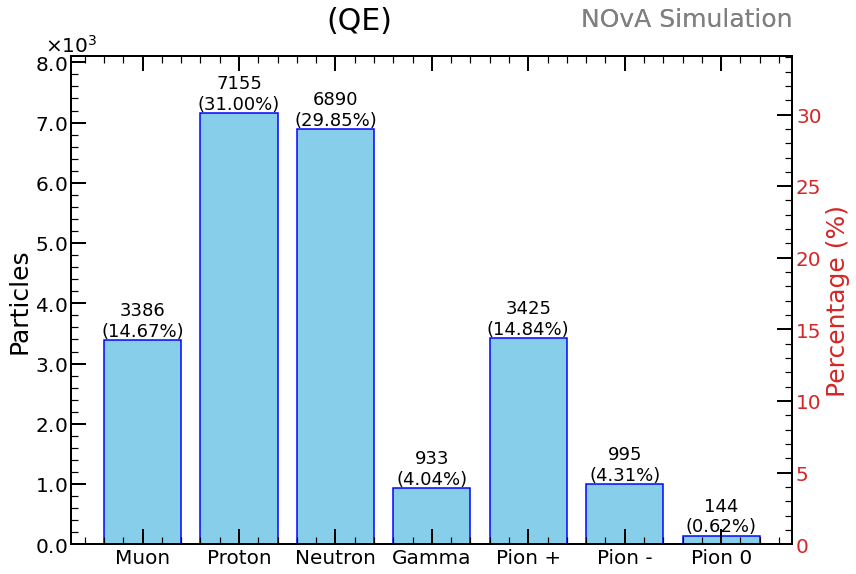

In [28]:
#Plot for the true distribution of reconstructed. FOR 1 PION ONLY
# Define the list
elements = pdgtrues

# Convert the elements list to integers
elements = [int(e) for e in elements]

# Count occurrences of each element
element_counts = Counter(elements)

print(element_counts)

# Calculate total number of elements
total_elements = len(elements)

# Calculate the percentage for each element
element_percentages = {element: (count / total_elements) * 100 for element, count in element_counts.items()}

# Map element counts and percentages to their respective particle IDs
particle_counts = {code_lists[element]: count for element, count in element_counts.items() if element in code_lists}
particle_percentages = {code_lists[element]: percentage for element, percentage in element_percentages.items() if element in code_lists}

# Print the results
print("Particle Counts:")
for particle, count in particle_counts.items():
    print(f"{particle}: {count} ({particle_percentages[particle]:.2f}%)")

# Define particles to exclude from plotting
exclude_particles = ['Kaon +', 'Kaon -', 'Positron', 'Electron','Muon +']

# Define the desired order of particles
desired_order = [ 'Muon', 'Proton', 'Neutron','Gamma', 'Pion +', 'Pion -','Pion 0' ]

# Filter particles and percentages for plotting
particles_to_plot = [particle for particle in desired_order if particle in particle_counts and particle not in exclude_particles]
counts_to_plot = [particle_counts[particle] for particle in particles_to_plot]
percentages_to_plot = [particle_percentages[particle] for particle in particles_to_plot]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
#ax1.set_xlabel('Particle', fontsize=25)
ax1.set_ylabel('Particles', fontsize=25)
bars = ax1.bar(particles_to_plot, counts_to_plot, color='skyblue', edgecolor='blue', linewidth=1.5)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', labelsize=12)
ax1.set_ylim(0, max(counts_to_plot) * 1.1)
set_plot_style()  # Uncomment if set_plot_style() is defined
set_sn2()  # Uncomment if set_sn2() is defined

# Add count and percentage annotations
for bar, count, percentage in zip(bars, counts_to_plot, percentages_to_plot):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{count}\n({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=18)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage (%)', color=color, fontsize=25)
ax2.plot(particles_to_plot, percentages_to_plot, color=color, marker='o', alpha=0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x', labelsize=12)
set_plot_style()  # Uncomment if set_plot_style() is defined

# Manually set the secondary y-axis limits to match the percentage range
max_percentage = max(percentages_to_plot) * 1.1
ax2.set_ylim(0, max_percentage)

fig.tight_layout()
plt.title(f'({folder})', x=0.4, y=1.042, fontsize=30)
plt.savefig(f"{folder}/analysisfiles/images/allpdgNT_part1_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/allpdgNT_part1_{folder}.png', bbox_inches='tight')
plt.show()


Counter({13: 3248, 211: 3213, 2212: 2749, 22: 917, -211: 716, -321: 32, -13: 8, -11: 3, 321: 2, 11: 2})
Particle Counts:
Pion +: 3213 (29.50%)
Muon: 3248 (29.83%)
Gamma: 917 (8.42%)
Proton: 2749 (25.24%)
Pion -: 716 (6.57%)
Kaon +: 2 (0.02%)
Muon +: 8 (0.07%)
Kaon -: 32 (0.29%)
Positron: 3 (0.03%)
Electron: 2 (0.02%)


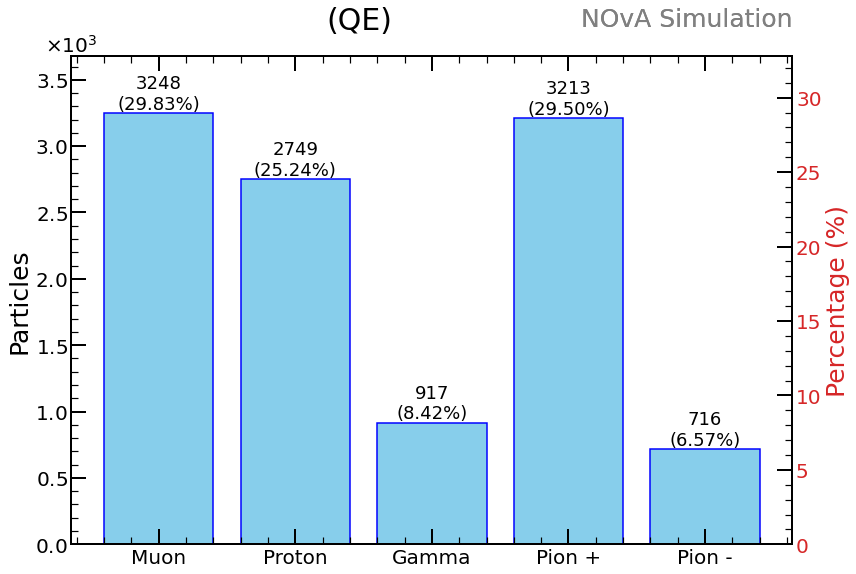

In [29]:
import matplotlib.pyplot as plt
from collections import Counter

elements = pdgrecos

# Convert the elements list to integers
elements = [int(e) for e in elements]

# Count occurrences of each element
element_counts = Counter(elements)

print(element_counts)

# Calculate total number of elements
total_elements = len(elements)

# Calculate the percentage for each element
element_percentages = {element: (count / total_elements) * 100 for element, count in element_counts.items()}

# Map element counts and percentages to their respective particle IDs
particle_counts = {code_lists[element]: count for element, count in element_counts.items() if element in code_lists}
particle_percentages = {code_lists[element]: percentage for element, percentage in element_percentages.items() if element in code_lists}

# Print the results
print("Particle Counts:")
for particle, count in particle_counts.items():
    print(f"{particle}: {count} ({particle_percentages[particle]:.2f}%)")

# Define particles to exclude from plotting
exclude_particles = ['Kaon +', 'Kaon -', 'Positron', 'Electron']

# Define the desired order of particles
desired_order = [ 'Muon', 'Proton', 'Neutron','Gamma', 'Pion +', 'Pion -','Pion 0' ]

# Filter particles and percentages for plotting
particles_to_plot = [particle for particle in desired_order if particle in particle_counts and particle not in exclude_particles]
counts_to_plot = [particle_counts[particle] for particle in particles_to_plot]
percentages_to_plot = [particle_percentages[particle] for particle in particles_to_plot]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
#ax1.set_xlabel('Particle', fontsize=25)
ax1.set_ylabel('Particles', fontsize=25)
bars = ax1.bar(particles_to_plot, counts_to_plot, color='skyblue', edgecolor='blue', linewidth=1.5)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', labelsize=12)
ax1.set_ylim(0, max(counts_to_plot) * 1.1)
set_plot_style()  # Uncomment if set_plot_style() is defined
set_sn2()  # Uncomment if set_sn2() is defined

# Add count and percentage annotations
for bar, count, percentage in zip(bars, counts_to_plot, percentages_to_plot):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{count}\n({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=18)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage (%)', color=color, fontsize=25)
ax2.plot(particles_to_plot, percentages_to_plot, color=color, marker='o', alpha=0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x', labelsize=12)
set_plot_style()  # Uncomment if set_plot_style() is defined
# Manually set the secondary y-axis limits to match the percentage range
max_percentage = max(percentages_to_plot) * 1.1
ax2.set_ylim(0, max_percentage)

fig.tight_layout()
plt.title(f'({folder})', x=0.4, y=1.042, fontsize=30)
plt.savefig(f"{folder}/analysisfiles/images/allpdgReco_part1_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/allpdgReco_part1_{folder}.png', bbox_inches='tight')
plt.show()


In [30]:
#check now the composition of unreco (clearly here there is no reco section to compare) FOR 1 PION ONLY

start_time = time.time()

allpdgtrue2=[]
allpdgtrue2=read_file2(folder, 'analysisfiles/allpdgNT_part2')

pdgtrues2=[]

for i, event in enumerate(allpdgtrue):
    #check events with only one pion
    pion=0
    for element in event:
        if element == '211' or element == '-211':
            pion=pion+1
    if pion == 1:
        for elements in event:
            pdgtrues2.append(elements)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.12850046157836914 seconds


Particle Counts:
Muon: 2834 (15.21%)
Proton: 6357 (34.12%)
Neutron: 6297 (33.80%)
Pion +: 2457 (13.19%)
Pion -: 377 (2.02%)
Kaon -: 35 (0.19%)
Kaon +: 3 (0.02%)
Gamma: 199 (1.07%)
Pion 0: 60 (0.32%)


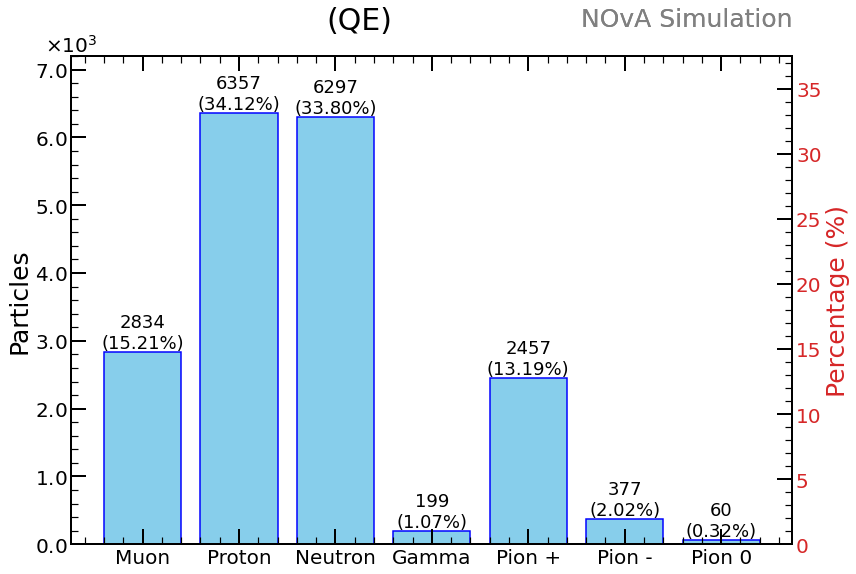

In [31]:
# Define the list
elements = pdgtrues2

# Convert the elements list to integers
elements = [int(e) for e in elements]

# Count occurrences of each element
element_counts = Counter(elements)

# Calculate total number of elements
total_elements = len(elements)

# Calculate the percentage for each element
element_percentages = {element: (count / total_elements) * 100 for element, count in element_counts.items()}

# Map element counts and percentages to their respective particle IDs
particle_counts = {code_lists[element]: count for element, count in element_counts.items() if element in code_lists}
particle_percentages = {code_lists[element]: percentage for element, percentage in element_percentages.items() if element in code_lists}

# Print the results
print("Particle Counts:")
for particle, count in particle_counts.items():
    print(f"{particle}: {count} ({particle_percentages[particle]:.2f}%)")

# Define particles to exclude from plotting
exclude_particles = ['Kaon +', 'Kaon -', 'Positron', 'Electron']

# Define the desired order of particles
desired_order = [ 'Muon', 'Proton', 'Neutron','Gamma', 'Pion +', 'Pion -','Pion 0' ]

# Filter particles and percentages for plotting
particles_to_plot = [particle for particle in desired_order if particle in particle_counts and particle not in exclude_particles]
counts_to_plot = [particle_counts[particle] for particle in particles_to_plot]
percentages_to_plot = [particle_percentages[particle] for particle in particles_to_plot]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
#ax1.set_xlabel('Particle', fontsize=25)
ax1.set_ylabel('Particles', fontsize=25)
bars = ax1.bar(particles_to_plot, counts_to_plot, color='skyblue', edgecolor='blue', linewidth=1.5)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', labelsize=12)
ax1.set_ylim(0, max(counts_to_plot) * 1.1)
set_plot_style()  # Uncomment if set_plot_style() is defined
set_sn2()  # Uncomment if set_sn2() is defined

# Add count and percentage annotations
for bar, count, percentage in zip(bars, counts_to_plot, percentages_to_plot):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{count}\n({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=18)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage (%)', color=color, fontsize=25)
ax2.plot(particles_to_plot, percentages_to_plot, color=color, marker='o', alpha=0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x', labelsize=12)
set_plot_style()  # Uncomment if set_plot_style() is defined

# Manually set the secondary y-axis limits to match the percentage range
max_percentage = max(percentages_to_plot) * 1.1
ax2.set_ylim(0, max_percentage)

fig.tight_layout()
plt.title(f'({folder})', x=0.4, y=1.042, fontsize=30)
plt.savefig(f"{folder}/analysisfiles/images/allpdgNT_part2_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/allpdgNT_part2_{folder}.png', bbox_inches='tight')
plt.show()

In [8]:
folder='MEC'

In [9]:
#now check events with all particles reconstructed, and see the distribution, then check with one missing, two, three, and so on.
start_time = time.time()

allpdgtrue=[]
allpdgtrue=read_file2(folder, 'analysisfiles/allpdgNT_part1')

allpdgreco=[]
allpdgreco=read_file2(folder, 'analysisfiles/allpdgReco_part1')

pdg1to1=[]


for i, event in enumerate(allpdgtrue):

    if len(event) == len(allpdgreco[i]):
        for element in allpdgreco[i]:
            pdg1to1.append(element)
#now for those events with discrepancies

pdgNtoN_total_reco = [[] for _ in range(5)]
pdgNtoN_lost = [[] for _ in range(5)]

for i, event in enumerate(allpdgtrue):
    #check the difference
    diff=len(event)-len(allpdgreco[i])
    #if recosntruction failed
    if diff >0 and diff<5:
        #print(allpdgreco[i])
        #print(allpdgtrue[i])
        #here we save the total pdg true particles
        # i need to implement tracking here, bc idk the exact unreconstructed particles
        # Count the occurrences of each element in both lists
        counter1 = Counter(allpdgreco[i])
        counter2 = Counter(allpdgtrue[i])
        
        # Create the new list with elements not in the first list
        #new_list = []
        
        # Iterate through elements in list2's counter
        for element, count in counter2.items():
            if element in counter1:
                difference = count - counter1[element]
                if difference > 0:
                    pdgNtoN_lost[diff].extend([element] * difference)
            else:
                pdgNtoN_lost[diff].extend([element] * count)
        
        #print("New list:", new_list)

        
        for element in allpdgreco[i]:
            if float(element) < 3000:
                pdgNtoN_total_reco[diff].append(element)
            #and now look at the non reconstructed particles
            
            #if element not in allpdgreco[i]:
             #   print('aqui')
              #  pdgNtoN_lost[diff].append(element)
    #non failed case
    if diff==0:
        for element in allpdgreco[i]:
            if float(element) < 3000:
                pdgNtoN_total_reco[0].append(element)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.0015075206756591797 seconds


Particle Counts:
Neutron: 14 (100.00%)


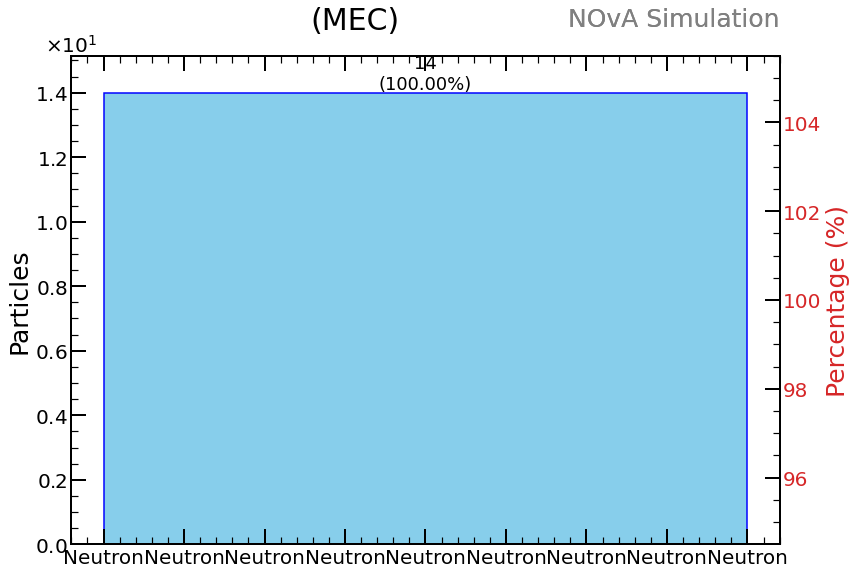

Particle Counts:
Proton: 17 (44.74%)
Neutron: 20 (52.63%)
Muon: 1 (2.63%)


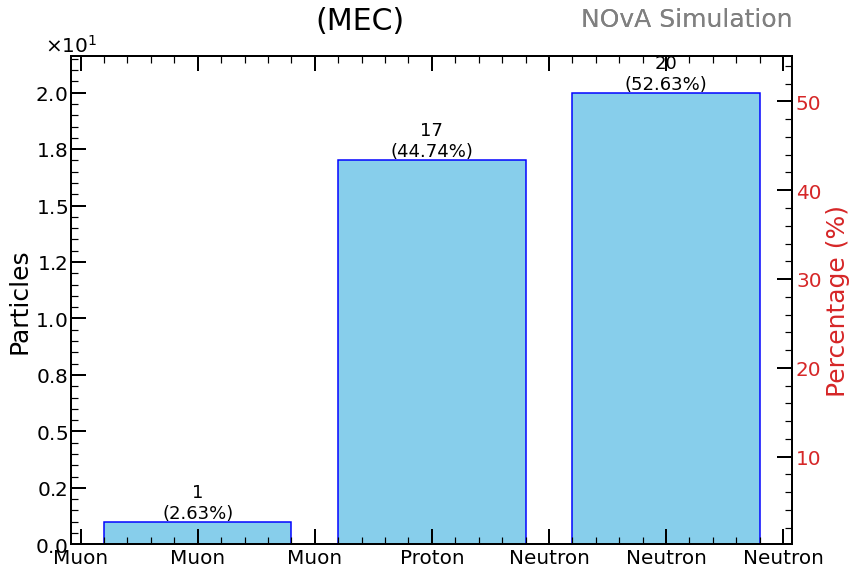

Particle Counts:
Proton: 40 (50.00%)
Neutron: 39 (48.75%)
Muon: 1 (1.25%)


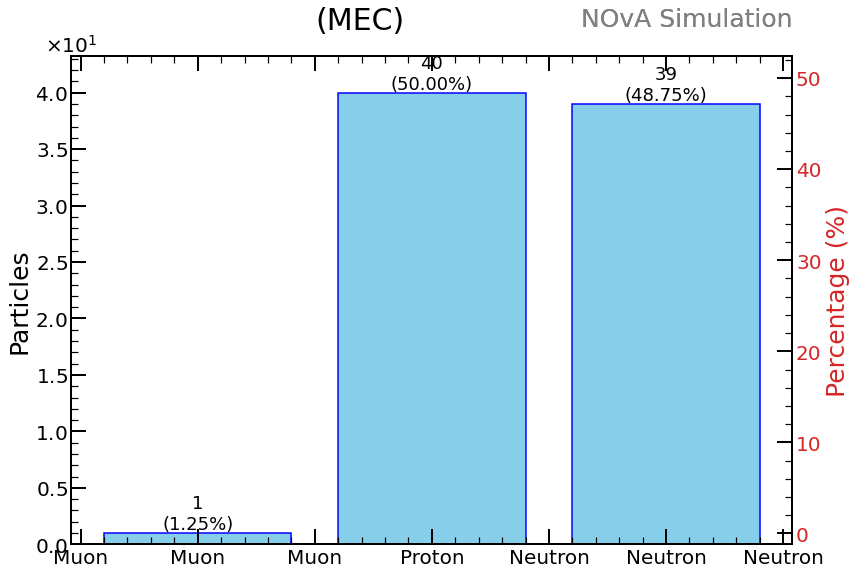

Particle Counts:
Proton: 38 (44.19%)
Neutron: 47 (54.65%)
Muon: 1 (1.16%)


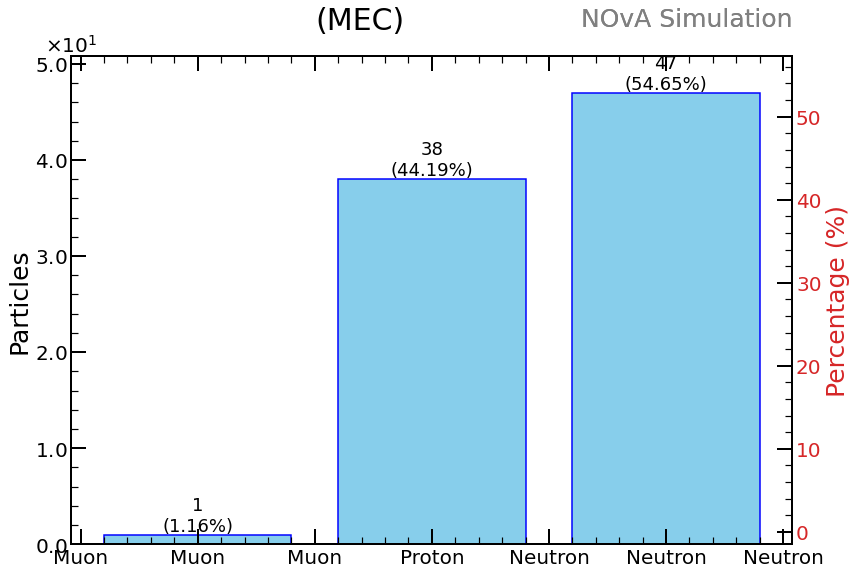

In [10]:
#plot then the distributions for the unreco particles in the incomplete events
for i in range(len(pdgNtoN_lost)):
    if len(pdgNtoN_lost[i])!=0:

        elements = pdgNtoN_lost[i]

        # Convert the elements list to integers
        elements = [int(e) for e in elements]

        # Count occurrences of each element
        element_counts = Counter(elements)

        # Calculate total number of elements
        total_elements = len(elements)

        # Calculate the percentage for each element
        element_percentages = {element: (count / total_elements) * 100 for element, count in element_counts.items()}

        # Map element counts and percentages to their respective particle IDs
        particle_counts = {code_lists[element]: count for element, count in element_counts.items() if element in code_lists}
        particle_percentages = {code_lists[element]: percentage for element, percentage in element_percentages.items() if element in code_lists}

        # Print the results
        print("Particle Counts:")
        for particle, count in particle_counts.items():
            print(f"{particle}: {count} ({particle_percentages[particle]:.2f}%)")

        # Define particles to exclude from plotting
        exclude_particles = ['Kaon +', 'Kaon -', 'Positron', 'Electron']

        # Define the desired order of particles
        desired_order = [ 'Muon', 'Proton', 'Neutron','Gamma', 'Pion +', 'Pion -','Pion 0' ]

        # Filter particles and percentages for plotting
        particles_to_plot = [particle for particle in desired_order if particle in particle_counts and particle not in exclude_particles]
        counts_to_plot = [particle_counts[particle] for particle in particles_to_plot]
        percentages_to_plot = [particle_percentages[particle] for particle in particles_to_plot]

        # Plotting
        fig, ax1 = plt.subplots(figsize=(12, 8))

        color = 'tab:blue'
        #ax1.set_xlabel('Particle', fontsize=25)
        ax1.set_ylabel('Particles', fontsize=25)
        bars = ax1.bar(particles_to_plot, counts_to_plot, color='skyblue', edgecolor='blue', linewidth=1.5)
        ax1.tick_params(axis='y')
        ax1.tick_params(axis='x', labelsize=12)
#         ax1.set_ylim(0, max(counts_to_plot) * 1.1)
        set_plot_style()  # Uncomment if set_plot_style() is defined
        set_sn2()  # Uncomment if set_sn2() is defined

        # Add count and percentage annotations
        for bar, count, percentage in zip(bars, counts_to_plot, percentages_to_plot):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{count}\n({percentage:.2f}%)', 
                     ha='center', va='bottom', fontsize=18)


        ax2 = ax1.twinx()
        color = 'tab:red'
        ax2.set_ylabel('Percentage (%)', color=color, fontsize=25)
        ax2.plot(particles_to_plot, percentages_to_plot, color=color, marker='o', alpha=0)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.tick_params(axis='x', labelsize=12)
        set_plot_style()  # Uncomment if set_plot_style() is defined

        fig.tight_layout()
        plt.title(f'({folder})', x=0.4, y=1.042, fontsize=30)
        plt.savefig(f"{folder}/analysisfiles/images/pdg_for_unreco_particles_incomplete_events_with_{i}_{folder}_part1.png", bbox_inches='tight')
        plt.show()

In [11]:
#here merge all the previous info and plot it 
pdgNtoN_lost_total=[]
for i in range(len(pdgNtoN_lost)):
    for element in pdgNtoN_lost[i]:
        pdgNtoN_lost_total.append(element)

Particle Counts:
Neutron: 120 (55.05%)
Proton: 95 (43.58%)
Muon: 3 (1.38%)


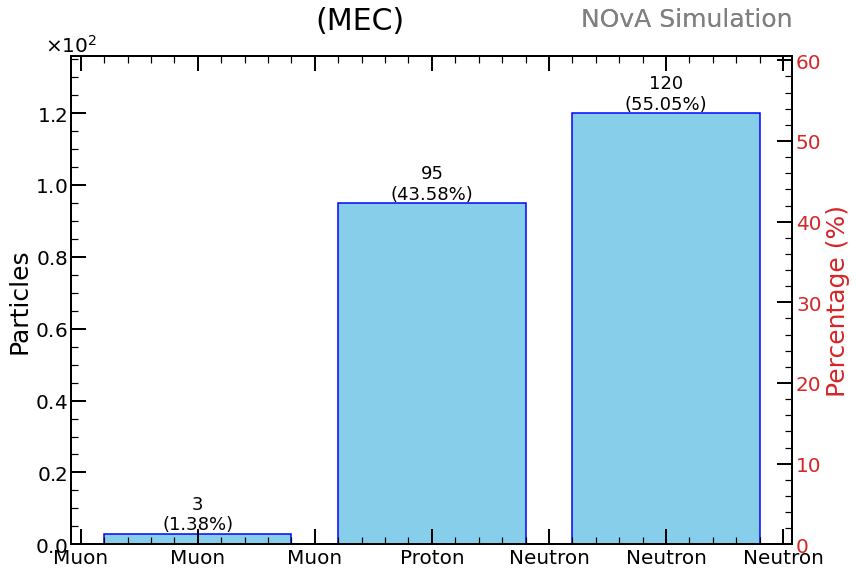

In [12]:
elements = pdgNtoN_lost_total

# Convert the elements list to integers
elements = [int(e) for e in elements]

# Count occurrences of each element
element_counts = Counter(elements)

# Calculate total number of elements
total_elements = len(elements)

# Calculate the percentage for each element
element_percentages = {element: (count / total_elements) * 100 for element, count in element_counts.items()}

# Map element counts and percentages to their respective particle IDs
particle_counts = {code_lists[element]: count for element, count in element_counts.items() if element in code_lists}
particle_percentages = {code_lists[element]: percentage for element, percentage in element_percentages.items() if element in code_lists}

# Print the results
print("Particle Counts:")
for particle, count in particle_counts.items():
    print(f"{particle}: {count} ({particle_percentages[particle]:.2f}%)")

# Define particles to exclude from plotting
exclude_particles = ['Kaon +', 'Kaon -', 'Positron', 'Electron']

# Define the desired order of particles
desired_order = [ 'Muon', 'Proton', 'Neutron','Gamma', 'Pion +', 'Pion -','Pion 0' ]

# Filter particles and percentages for plotting
particles_to_plot = [particle for particle in desired_order if particle in particle_counts and particle not in exclude_particles]
counts_to_plot = [particle_counts[particle] for particle in particles_to_plot]
percentages_to_plot = [particle_percentages[particle] for particle in particles_to_plot]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
#ax1.set_xlabel('Particle', fontsize=25)
ax1.set_ylabel('Particles', fontsize=25)
bars = ax1.bar(particles_to_plot, counts_to_plot, color='skyblue', edgecolor='blue', linewidth=1.5)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', labelsize=12)
ax1.set_ylim(0, max(counts_to_plot) * 1.1)
set_plot_style()  # Uncomment if set_plot_style() is defined
set_sn2()  # Uncomment if set_sn2() is defined

# Add count and percentage annotations
for bar, count, percentage in zip(bars, counts_to_plot, percentages_to_plot):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{count}\n({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=18)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage (%)', color=color, fontsize=25)
ax2.plot(particles_to_plot, percentages_to_plot, color=color, marker='o', alpha=0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x', labelsize=12)
set_plot_style()  # Uncomment if set_plot_style() is defined

# Manually set the secondary y-axis limits to match the percentage range
max_percentage = max(percentages_to_plot) * 1.1
ax2.set_ylim(0, max_percentage)

fig.tight_layout()
plt.title(f'({folder})', x=0.4, y=1.042, fontsize=30)
plt.savefig(f"{folder}/analysisfiles/images/pdg_for_unreco_particles_incomplete_events_with_total_{folder}_part1.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/pdg_for_unreco_particles_incomplete_events_with_total_{folder}_part1.png', bbox_inches='tight')
plt.show()

Particle Counts:
Muon: 1 (20.00%)
Pion +: 2 (40.00%)
Proton: 2 (40.00%)


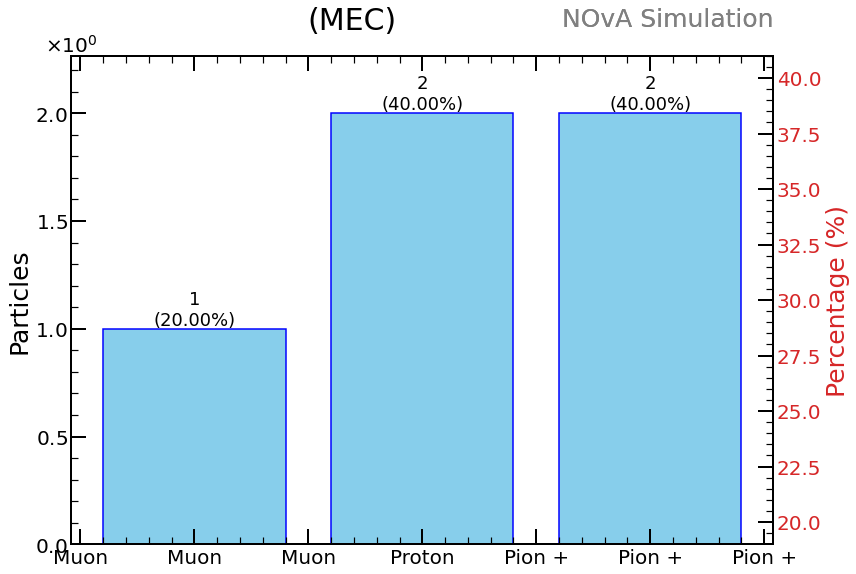

Particle Counts:
Muon: 9 (23.68%)
Proton: 20 (52.63%)
Pion +: 8 (21.05%)
Pion -: 1 (2.63%)


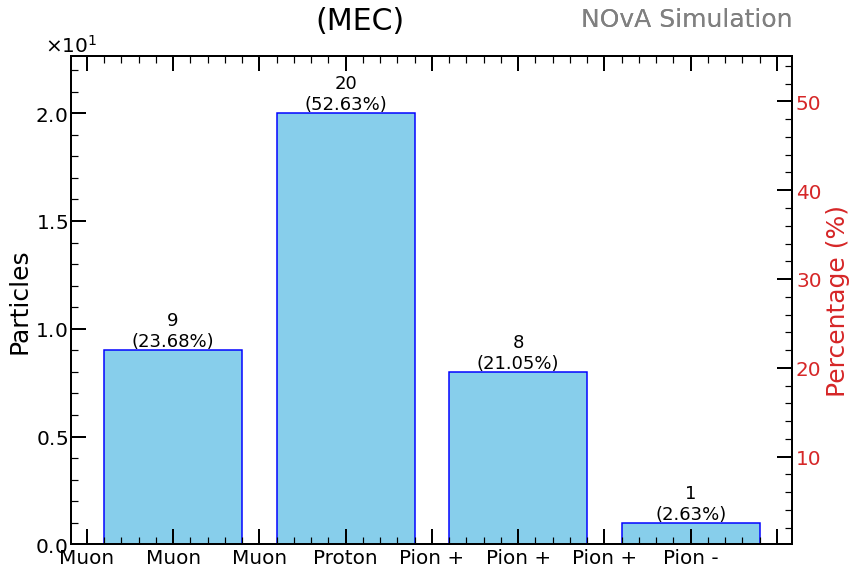

Particle Counts:
Muon: 16 (30.19%)
Pion -: 4 (7.55%)
Proton: 17 (32.08%)
Pion +: 16 (30.19%)


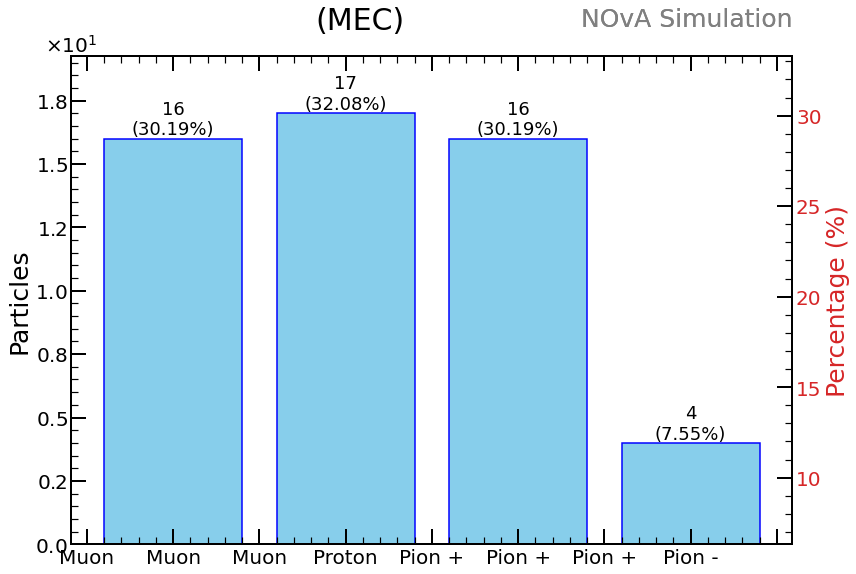

Particle Counts:
Muon: 25 (35.71%)
Proton: 18 (25.71%)
Pion +: 22 (31.43%)
Pion -: 4 (5.71%)
Gamma: 1 (1.43%)


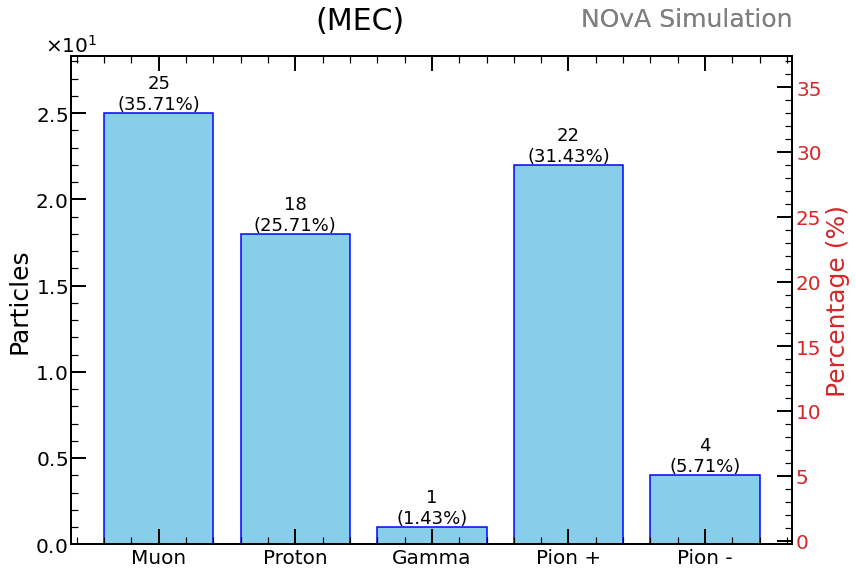

Particle Counts:
Muon: 21 (39.62%)
Proton: 11 (20.75%)
Pion +: 17 (32.08%)
Pion -: 4 (7.55%)


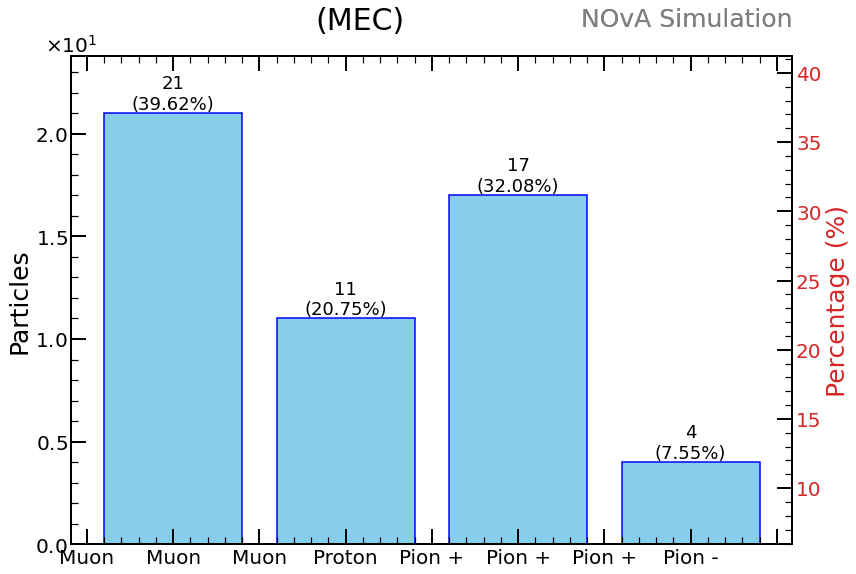

In [13]:
#plot then the distribution of the reco particles depending the incompletiness of the events
for i in range(len(pdgNtoN_total_reco)):

    elements = pdgNtoN_total_reco[i]
    
    # Convert the elements list to integers
    elements = [int(e) for e in elements]
    
    # Count occurrences of each element
    element_counts = Counter(elements)
    
    # Calculate total number of elements
    total_elements = len(elements)
    
    # Calculate the percentage for each element
    element_percentages = {element: (count / total_elements) * 100 for element, count in element_counts.items()}
    
    # Map element counts and percentages to their respective particle IDs
    particle_counts = {code_lists[element]: count for element, count in element_counts.items() if element in code_lists}
    particle_percentages = {code_lists[element]: percentage for element, percentage in element_percentages.items() if element in code_lists}
    
    # Print the results
    print("Particle Counts:")
    for particle, count in particle_counts.items():
        print(f"{particle}: {count} ({particle_percentages[particle]:.2f}%)")
    
    # Define particles to exclude from plotting
    exclude_particles = ['Kaon +', 'Kaon -', 'Positron', 'Electron']
    
    # Define the desired order of particles
    desired_order = [ 'Muon', 'Proton', 'Neutron','Gamma', 'Pion +', 'Pion -','Pion 0' ]

    # Filter particles and percentages for plotting
    particles_to_plot = [particle for particle in desired_order if particle in particle_counts and particle not in exclude_particles]
    counts_to_plot = [particle_counts[particle] for particle in particles_to_plot]
    percentages_to_plot = [particle_percentages[particle] for particle in particles_to_plot]

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 8))

    color = 'tab:blue'
    #ax1.set_xlabel('Particle', fontsize=25)
    ax1.set_ylabel('Particles', fontsize=25)
    bars = ax1.bar(particles_to_plot, counts_to_plot, color='skyblue', edgecolor='blue', linewidth=1.5)
    ax1.tick_params(axis='y')
    ax1.tick_params(axis='x', labelsize=12)
    ax1.set_ylim(0, max(counts_to_plot) * 1.1)
    set_plot_style()  # Uncomment if set_plot_style() is defined
    set_sn2()  # Uncomment if set_sn2() is defined

    # Add count and percentage annotations
    for bar, count, percentage in zip(bars, counts_to_plot, percentages_to_plot):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{count}\n({percentage:.2f}%)', 
                 ha='center', va='bottom', fontsize=18)


    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Percentage (%)', color=color, fontsize=25)
    ax2.plot(particles_to_plot, percentages_to_plot, color=color, marker='o', alpha=0)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.tick_params(axis='x', labelsize=12)
    set_plot_style()  # Uncomment if set_plot_style() is defined

    fig.tight_layout()
    plt.title(f'({folder})', x=0.4, y=1.042, fontsize=30)
    plt.savefig(f"{folder}/analysisfiles/images/pdg_for_reco_particles_in_incomplete_events_with_{i}_{folder}_part1.png", bbox_inches='tight')
    plt.show()

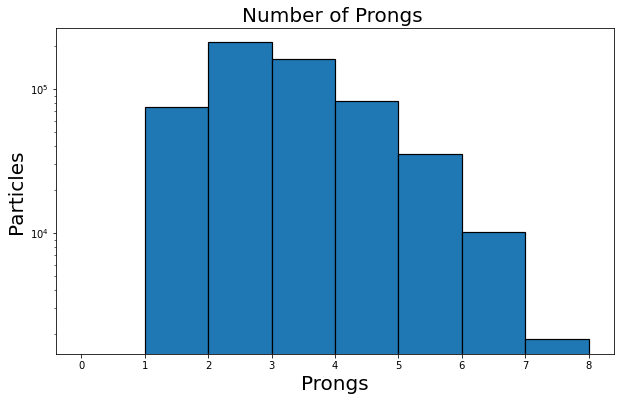

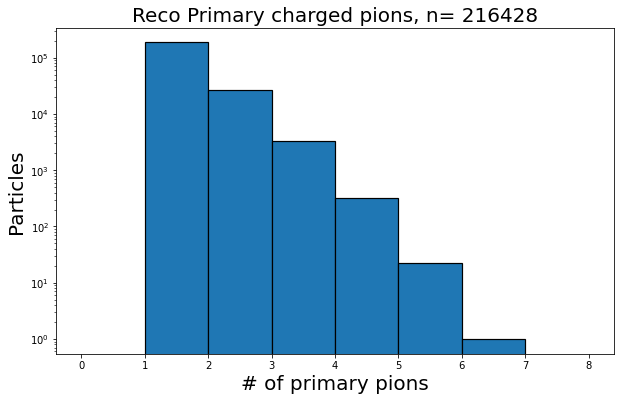

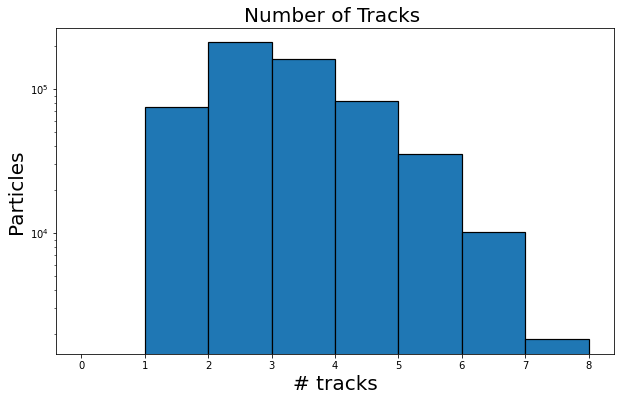

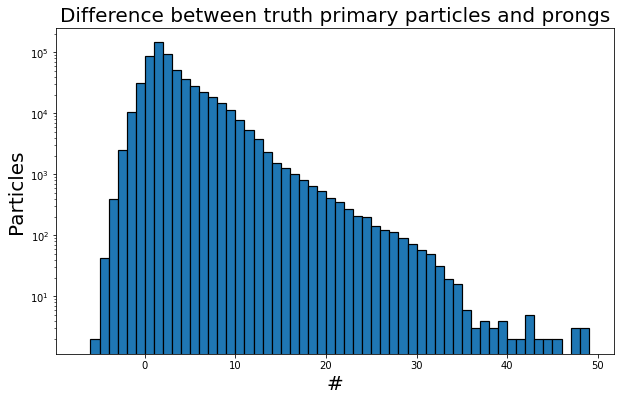

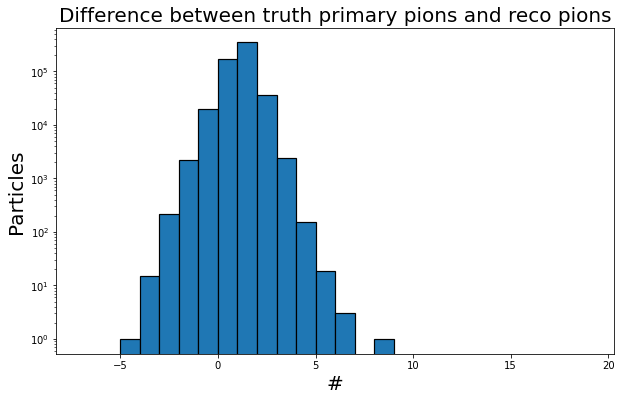

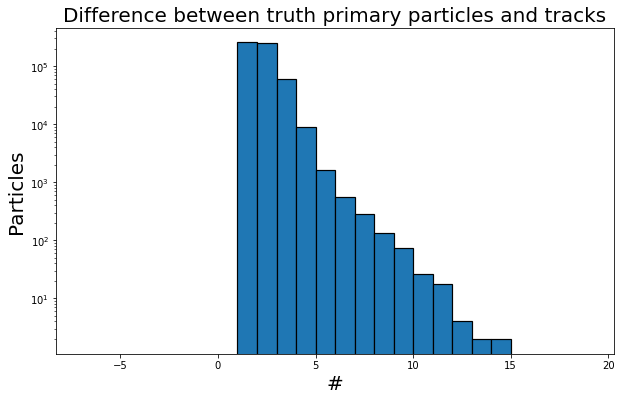

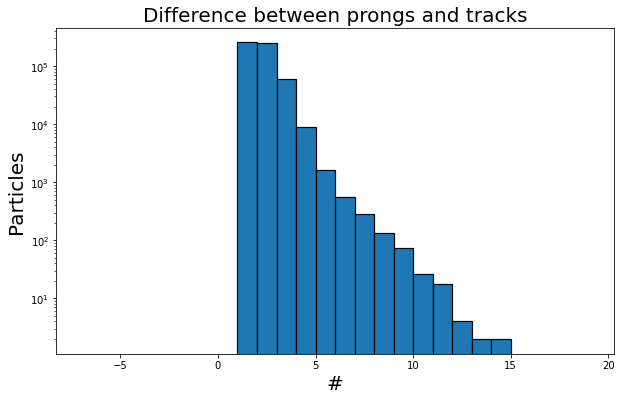

In [4]:
# Define histogram parameters
bin_size = 1
bin_edges = np.arange(0, 9, bin_size) 

#NUMPRONGS
plt.figure(figsize=(10, 6)) 
plt.hist(numprongs, bins=bin_edges, edgecolor='black', linewidth=1.2)
plt.xlabel('Prongs', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Number of Prongs ', fontsize=20)
plt.yscale('log')
plt.savefig(f"{folder}/images/numprongs.png")
plt.show()

#NUMPIRECO
npire = len(numpireco)
plt.figure(figsize=(10, 6)) 
plt.hist(numpireco, bins=bin_edges, edgecolor='black', linewidth=1.2)
plt.xlabel('# of primary pions', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title(f'Reco Primary charged pions, n= {npire}', fontsize=20)
plt.yscale('log')
plt.savefig(f"{folder}/images/numpireco.png")
plt.show()

#NUMTRACKS
plt.figure(figsize=(10, 6)) 
plt.hist(numprongs, bins=bin_edges, edgecolor='black', linewidth=1.2)
plt.xlabel('# tracks', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Number of Tracks ', fontsize=20)
plt.yscale('log')
plt.savefig(f"{folder}/images/numtracks.png")
plt.show()


bin_edges = np.arange(-7, 50, bin_size) 

#Diff prim prongs
plt.figure(figsize=(10, 6)) 
plt.hist(diffprimprongs, bins=bin_edges, edgecolor='black', linewidth=1.2)
plt.xlabel('#', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Difference between truth primary particles and prongs', fontsize=20)
plt.yscale('log')
plt.savefig(f"{folder}/images/diffprimprongs.png")
plt.show()


bin_edges = np.arange(-7, 20, bin_size) 

#Diff prim pi and reco pi
plt.figure(figsize=(10, 6)) 
plt.hist(diffprimpirecopi, bins=bin_edges, edgecolor='black', linewidth=1.2)
plt.xlabel('#', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Difference between truth primary pions and reco pions', fontsize=20)
plt.yscale('log')
plt.savefig(f"{folder}/images/diffprimpirecopi.png")
plt.show()

#Diff prim part and tracks
plt.figure(figsize=(10, 6)) 
plt.hist(diffprimparttracks, bins=bin_edges, edgecolor='black', linewidth=1.2)
plt.xlabel('#', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Difference between truth primary particles and tracks', fontsize=20)
plt.yscale('log')
plt.savefig(f"{folder}/images/diffprimparttracks.png")
plt.show()

#Diff prongs and tracks
plt.figure(figsize=(10, 6)) 
plt.hist(diffprongstracks, bins=bin_edges, edgecolor='black', linewidth=1.2)
plt.xlabel('#', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Difference between prongs and tracks', fontsize=20)
plt.yscale('log')
plt.savefig(f"{folder}/images/diffprongstracks.png")
plt.show()


In [21]:
#Now take the information of the energies

start_time = time.time()


#NAME OF THE VARIABLE OR LIST BEING USED
common_name = "epi"
name_of_file = 'calenergiesvars_total'

#Extract the info----------No touch--------------------
path_variable = f"{common_name}_path"
file_variable = f"{common_name}file"
ALLRows_variable = f"ALLRows{common_name}"
list_variable = f"{common_name}_infolist"
globals()[path_variable] = f"{folder}/{name_of_file}.txt"
globals()[file_variable] = open(globals()[path_variable], "r")
globals()[ALLRows_variable] = csv.reader(globals()[file_variable], delimiter=' ')
globals()[list_variable] = [row for row in globals()[ALLRows_variable]]
#---------------------------------------------------------------------


epiReco = []

for event in globals()[list_variable]:
    event = event[1:-1]
    l = len(event)
    for i in range(l):
        epiReco.append(float(event[i]))
        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 2.8218321800231934 seconds


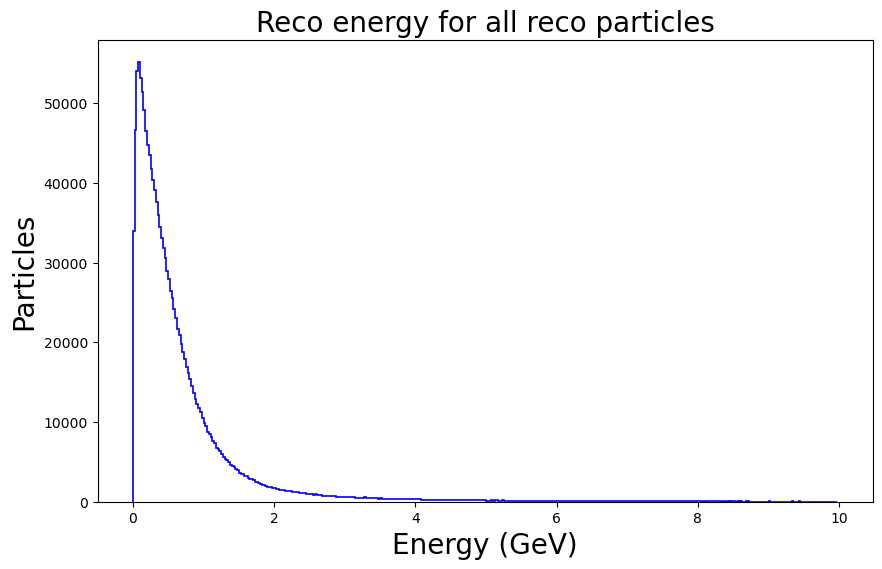

In [26]:
# Define histogram parameters
bin_size = 0.025
bin_edges = np.arange(0, 10, bin_size) 
#Epi for PNG nocvn
plt.figure(figsize=(10, 6)) 
plt.hist(epiReco, bins=bin_edges, edgecolor='blue', linewidth=1.2, histtype='step')
plt.xlabel('Energy (GeV)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Reco energy for all reco particles', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.savefig(f"{folder}/images/EReco.png")
plt.show()

NEXT PART IS DEPRECIATED!!!

649813
1452871


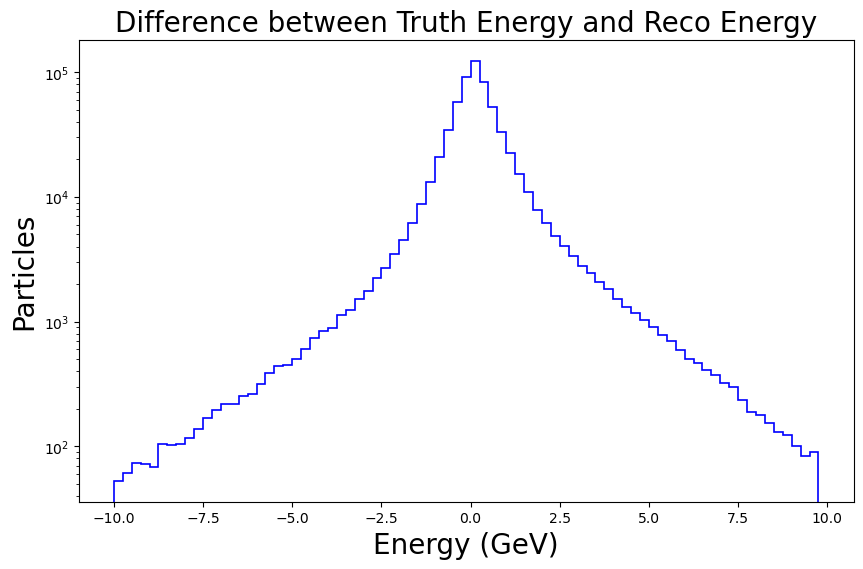

In [22]:
%store -r epiNT
print(len(epiNT))
print(len(epiReco))

epiNT_minus_epiReco = []

# Calculate the difference between epiNT and epiReco
epiNT_minus_epiReco = [nt - reco for nt, reco in zip(epiNT, epiReco)]

#for i in range(min(len(epiNT), len(epiReco))):
#    epiNT_minus_epiReco.append(epiNT[i] - epiReco[i])
    
# Define histogram parameters
bin_size = 0.25
bin_edges = np.arange(-10, 10, bin_size) 
#Epi for PNG nocvn
plt.figure(figsize=(10, 6)) 
plt.hist(epiNT_minus_epiReco, bins=bin_edges, edgecolor='blue', linewidth=1.2, histtype='step')
plt.xlabel('Energy (GeV)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Difference between Truth Energy and Reco Energy', fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)


plt.savefig(f"{folder}/images/epiNT_minus_epiReco.png")
plt.show()

In [19]:
# Find the maximum value in the distribution
max_value = max(epiNT_minus_epiReco)
print(max_value)
max_index = epiNT_minus_epiReco.index(max_value)
print(max_index)
#max_bin_center = (bin_edges[max_index] + bin_edges[max_index + 1]) / 2

# Plot a line marking the maximum value
#plt.axvline(x=max_bin_center, color='red', linestyle='--', label=f'Maximum: {max_value:.2f} GeV')

#plt.legend(fontsize=12)

33.16292
357310


649813
1452871


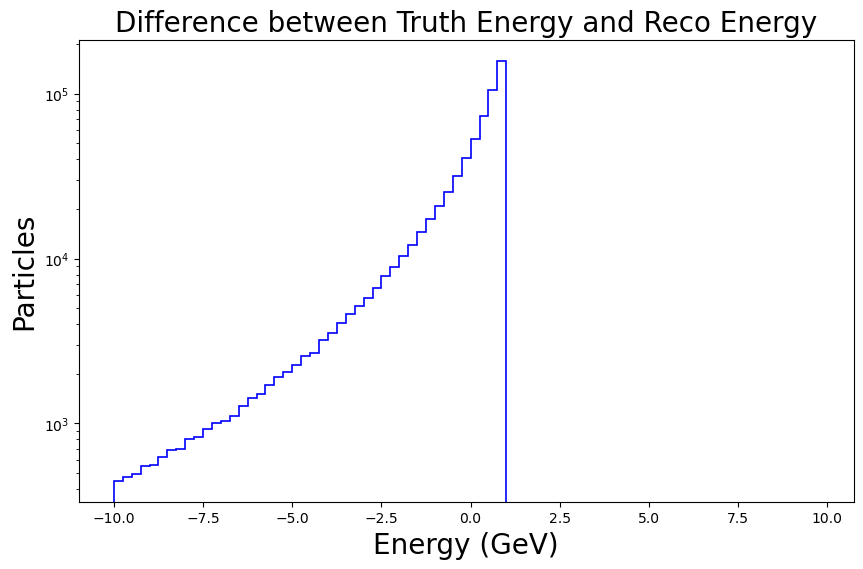

In [13]:
#RESOLUTION PLOT

%store -r epiNT
print(len(epiNT))
print(len(epiReco))

epiNT_minus_epiReco_Resolution = []

for i in range(min(len(epiNT), len(epiReco))):
    epiNT_minus_epiReco_Resolution.append((epiNT[i] - epiReco[i])/epiNT[i])
    
# Define histogram parameters
bin_size = 0.25
bin_edges = np.arange(-10, 10, bin_size) 
#Epi for PNG nocvn
plt.figure(figsize=(10, 6)) 
plt.hist(epiNT_minus_epiReco_Resolution, bins=bin_edges, edgecolor='blue', linewidth=1.2, histtype='step')
plt.xlabel('Energy (GeV)', fontsize=20)
plt.ylabel('Particles', fontsize=20)
plt.title('Difference between Truth Energy and Reco Energy', fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.savefig(f"{folder}/images/epiNT_minus_epiReco_Resolution.png")
plt.show()